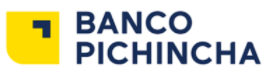






# Prueba práctica de conocimientos Data Engineer y Data Engineer Senior

### La prueba consta de 2 secciones:
### Sección 1: Temas de SQL:  Estos temas fueron elaborados en lenguaje SLQ Lite.
### Sección 2: Temas Pyspark.

##Preparación ambientes SQL y Pyspark

******************************************************************************************
###  En la siguiente sección encontrará un texto que dice " A LA IZQUIERDA DE ESTA LINEA ENCONTRARÁ EL BOTÓN PLAY".  Debe dar clic en ese botón para que pueda configurar el ambiente de compilación.
###  Despuesde dar play, verifique que el codigo se haya ejecutado en su totalidad viendo los mensajes "3.38.2" y "CONFIGURACION DE AMBIENTE SQL y SPARK FINALIZADO"
******************************************************************************************



In [ ]:
############## A LA IZQUIERA DE ESTA LINEA ENCONTRÁ EL BOTON PLAY ############## 
# Configurar ambiente Spark
print("INICIO CONFIGURACIÓN AMBIENTE SPARK")
!pip install pyspark
!pip install -U -q PyDrive

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#########################################
### Reinicio automatico ambiente
print("INICIO CONFIGURACIÓN AMBIENTE SQL")
!curl https://www.sqlite.org/src/tarball/sqlite.tar.gz?r=release | tar xz
%cd sqlite/
!./configure
!make sqlite3.c
%cd /content
!npx degit coleifer/pysqlite3 -f
!cp sqlite/sqlite3.[ch] .
!python setup.py build_static build
!cp build/lib.linux-x86_64-3.7/pysqlite3/_sqlite3.cpython-37m-x86_64-linux-gnu.so \
     /usr/lib/python3.7/lib-dynload/
#######################################
print("CONFIGURACION DE AMBIENTE SQL y SPARK FINALIZADO")

INICIO CONFIGURACIÓN AMBIENTE SPARK
INICIO CONFIGURACIÓN AMBIENTE SQL
CONFIGURACION DE AMBIENTE SQL y SPARK FINALIZADO


###  Ejecutar la siguiente sección, reiniciara el ambiente y saldra un mensaje de fallo de la sesión, pero es originado por el reinicio necesario para que la configuración tenga efecto

In [ ]:
import os
os.kill(os.getpid(), 9)

: 

### Ejecutar la siguiente sección. si todo  esta correctamente configurado el mensaje "3.38.2" debe aparecer

In [ ]:
import sqlite3
print(sqlite3.sqlite_version)

3.38.2


# ----------------------------------------------------------------------------------------------------------

#Inicio prueba práctica

## Sección 1: SQL

###SQL: Antecedente -> Pregunta 1:

### Simulación de primera ronda Qatar 2022

Breve información de los datos disponibles:

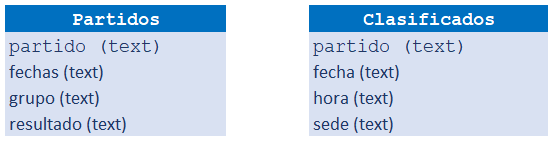

**Descripción:**

Se ha descargado de una página oficial dos sets de datos:

1.   Partidos.  Contiene información de la primera ronda de juegos a realizarse en el mundial de QATAR 2022 con una columna de resultado simulado por un algoritmo en etapa de pruebas.
2.   Clasificados. Contiene información de las fechas y sedes de la segunda ronda.  No se especifica los nombres de los equipos, únicamente una descripción de primer y segundo lugar dentro de cada grupo.
3.   Resultados_Qatar.  Es una tabla auxiliar que se utilizará en el ejercicio 2.  Esta tabla contiene los resultados esperados luego de ejecutar el script desarrollado por usted en el ejercicio 1.



NOTA:  
* Tener en cuenta que al ser data descargada de un portal, el origen no tiene las características de una base de datos relacional.

* Podría existir problemas de calidad de los datos que debe resolver en el query.

* Sus consultas se ejecutan utilizando SQLite, por lo que debe ajustarse a las construcciones SQL admitidas por SQLite.

####Para cargar el set de datos por favor ejecutar la siguiente celda:

In [ ]:
## Delete the tables if they already exist 

conn = sqlite3.connect('test.db')
print("Base de datos abierta con exito");

conn.execute('''drop table if exists Partidos;''')
conn.execute("create table Partidos(partido text, fechas text, grupo text, resultado text);")

conn.execute("insert into Partidos values('Qatar vs. Ecuador','21/11/2022','GRUPO A','0,1');")
conn.execute("insert into Partidos values('Senegal vs. Holanda','21/11/2022','GRUPO A','2,5');")
conn.execute("insert into Partidos values('Qatar vs. Senegal','25/11/2021','GRUPO A','0,5');")
conn.execute("insert into Partidos values('Holanda vs. Ecuador','25/11/2021','GRUPO A','3,3');")
conn.execute("insert into Partidos values('Holanda vs. Qatar','29/11/2021','GRUPO A','5,5');")
conn.execute("insert into Partidos values('Ecuador vs. Senegal','29/11/2021','GRUPO A','3,2');")
conn.execute("insert into Partidos values('Inglaterra vs. Irán','21/11/2022','GRUPO B','4,0');")
conn.execute("insert into Partidos values('Estados Unidos vs. Ucrania-Escocia-Gales','21/11/2022','GRUPO B','1,5');")
conn.execute("insert into Partidos values('Inglaterra vs. Estados Unidos','25/11/2021','GRUPO B','4,1');")
conn.execute("insert into Partidos values('Ucrania-Escocia-Gales vs. Iran','25/11/2021','GRUPO B','2,2');")
conn.execute("insert into Partidos values('Ucrania-Escocia-Gales vs. Inglaterra','29/11/2021','GRUPO B','0,1');")
conn.execute("insert into Partidos values('Irán vs. Estados Unidos','29/11/2021','GRUPO B','0,0');")
conn.execute("insert into Partidos values('Argentina vs. Arabia Saudi','22/11/2022','GRUPO C','5,1');")
conn.execute("insert into Partidos values('México vs. Polonia','22/11/2022','GRUPO C','1,5');")
conn.execute("insert into Partidos values('Argentina vs. México','26/11/2021','GRUPO C','3,0');")
conn.execute("insert into Partidos values('Polonia vs. Arabia Saudí','26/11/2021','GRUPO C','1,2');")
conn.execute("insert into Partidos values('Polonia vs. Argentina','30/11/2021','GRUPO C','2,4');")
conn.execute("insert into Partidos values('Arabia Saudí vs. México','30/11/2021','GRUPO C','5,5');")
conn.execute("insert into Partidos values('Francia vs. Peru-Australia-EAU','22/11/2022','GRUPO D','1,1');")
conn.execute("insert into Partidos values('Dinamarca vs. Túnez','22/11/2022','GRUPO D','5,2');")
conn.execute("insert into Partidos values('Francia vs. Dinamarca','26/11/2021','GRUPO D','0,0');")
conn.execute("insert into Partidos values('Túnez vs. Perú-Australia-EAU','26/11/2021','GRUPO D','0,5');")
conn.execute("insert into Partidos values('Túnez vs. Francia','30/11/2021','GRUPO D','4,0');")
conn.execute("insert into Partidos values('Perú-Australia-EAU vs. Dinamarca','30/11/2021','GRUPO D','0,0');")
conn.execute("insert into Partidos values('España vs. Costa Rica-Nueva Zelanda.','23/11/2022','GRUPO E','2,0');")
conn.execute("insert into Partidos values('Alemania vs. Japón','23/11/2022','GRUPO E','5,3');")
conn.execute("insert into Partidos values('España vs. Alemania','27/11/2021','GRUPO E','1,2');")
conn.execute("insert into Partidos values('Japón vs. Costa Rica-Nueva Zelanda','27/11/2021','GRUPO E','2,2');")
conn.execute("insert into Partidos values('Japón vs. Espana','01/12/2021','GRUPO E','2,1');")
conn.execute("insert into Partidos values('Costa Rica-Nueva Zelanda vs. Alemania','01/12/2021','GRUPO E','3,0');")
conn.execute("insert into Partidos values('Portugal vs. Ghana','24/11/2022','GRUPO F','2,1');")
conn.execute("insert into Partidos values('Uruguay vs. Corea del Sur','24/11/2022','GRUPO F','0,2');")
conn.execute("insert into Partidos values('Portugal vs. Uruguay','28/11/2021','GRUPO F','1,1');")
conn.execute("insert into Partidos values('Corea del Sur vs. Ghana','28/11/2021','GRUPO F','3,1');")
conn.execute("insert into Partidos values('Corea del Sur vs. Portugal.','02/12/2021','GRUPO F','4,5');")
conn.execute("insert into Partidos values('Ghana vs. Uruguay.','02/12/2021','GRUPO F','2,3');")

# Localidades y fecha de los partidos de la segunda ronda

conn.execute('''drop table if exists Clasificados;''')
conn.execute("create table Clasificados(partido text, fecha text, hora text, sede text);")

conn.execute("insert into Clasificados values('1º del grupo A vs. 2º del grupo B','03/12/2022','06:00:00 PM','Estadio Khalifa, Rayán');")
conn.execute("insert into Clasificados values('1º del grupo C vs. 2º del grupo D','03/12/2022','10:00:00 PM','Estadio Ahmed bin Ali, Rayán');")
conn.execute("insert into Clasificados values('1º del grupo D vs. 2º del grupo C','04/12/2022','06:00:00 PM','Estadio Al Thumama, Doha');")
conn.execute("insert into Clasificados values('1º del grupo B vs. 2º del grupo A','04/12/2022','10:00:00 PM','Estadio Al Bayt, Jor');")
conn.execute("insert into Clasificados values('1º del grupo E vs. 2º del grupo F','05/12/2022','06:00:00 PM','Estadio Al Janoub, Al Wakrah');")
conn.execute("insert into Clasificados values('1º del grupo G vs. 2º del grupo H','05/12/2022','10:00:00 PM','Estadio 974, Doha');")
conn.execute("insert into Clasificados values('1º del grupo F vs. 2º del grupo E','06/12/2022','06:00:00 PM','Estadio Qatar Foundation, Rayán');")
conn.execute("insert into Clasificados values('1º del grupo H vs. 2º del grupo G','06/12/2022','10:00:00 PM','Estadio Icónico, Lusail');")

# Totales obtenidos de la simulación por equipo

conn.execute('''drop table if exists Resultados_Qatar;''')
conn.execute("create table Resultados_Qatar(equipo text,grupo text, puntos int, gol_diferencia int);")

conn.execute("insert into Resultados_Qatar values('ALEMANIA','GRUPO E','6','0');")
conn.execute("insert into Resultados_Qatar values('ARABIA SAUDI','GRUPO C','4','-3');")
conn.execute("insert into Resultados_Qatar values('ARGENTINA','GRUPO C','9','9');")
conn.execute("insert into Resultados_Qatar values('COREA DEL SUR','GRUPO F','6','3');")
conn.execute("insert into Resultados_Qatar values('COSTA RICA-NUEVA ZELANDA','GRUPO E','4','1');")
conn.execute("insert into Resultados_Qatar values('DINAMARCA','GRUPO D','5','3');")
conn.execute("insert into Resultados_Qatar values('ECUADOR','GRUPO A','7','2');")
conn.execute("insert into Resultados_Qatar values('ESPANA','GRUPO E','3','0');")
conn.execute("insert into Resultados_Qatar values('ESTADOS UNIDOS','GRUPO B','1','-7');")
conn.execute("insert into Resultados_Qatar values('FRANCIA','GRUPO D','2','-4');")
conn.execute("insert into Resultados_Qatar values('GHANA','GRUPO F','0','-4');")
conn.execute("insert into Resultados_Qatar values('HOLANDA','GRUPO A','5','3');")
conn.execute("insert into Resultados_Qatar values('INGLATERRA','GRUPO B','9','8');")
conn.execute("insert into Resultados_Qatar values('IRAN','GRUPO B','2','-4');")
conn.execute("insert into Resultados_Qatar values('JAPON','GRUPO E','4','-1');")
conn.execute("insert into Resultados_Qatar values('MEXICO','GRUPO C','1','-7');")
conn.execute("insert into Resultados_Qatar values('PERU-AUSTRALIA-EAU','GRUPO D','5','5');")
conn.execute("insert into Resultados_Qatar values('POLONIA','GRUPO C','3','1');")
conn.execute("insert into Resultados_Qatar values('PORTUGAL','GRUPO F','7','2');")
conn.execute("insert into Resultados_Qatar values('QATAR','GRUPO A','1','-6');")
conn.execute("insert into Resultados_Qatar values('SENEGAL','GRUPO A','3','1');")
conn.execute("insert into Resultados_Qatar values('TUNEZ','GRUPO D','3','-4');")
conn.execute("insert into Resultados_Qatar values('UCRANIA-ESCOCIA-GALES','GRUPO B','4','3');")
conn.execute("insert into Resultados_Qatar values('URUGUAY','GRUPO F','4','-1');")

conn.commit()
print("Valores insertados con éxito");




Base de datos abierta con exito
Valores insertados con éxito


####SQL: Pregunta 1:  Se ha realizado una simulación de la primera ronda de partidos en el mundial de QATAR 2022, cuyos resultados se han almacenado en la tabla "Partidos".  Mediante un proceso manual en Excel se elaboró el siguiente resumen: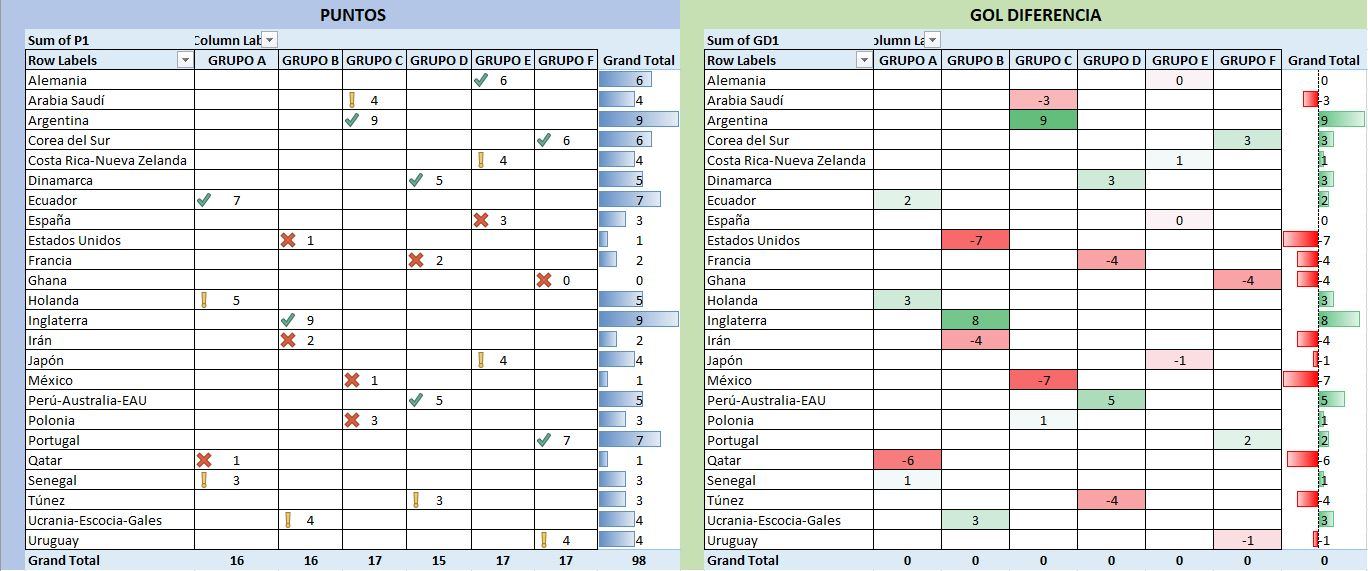

<b>PEDIDO:  Se solicita elaborar un reporte que calcule de forma automática la siguiente información:  Equipo, Grupo al que pertenece, Total Puntos Obtenidos en todos los partidos y Sumatoria del Gol Diferencia logrado en cada partido.

--------------------------------------------
<b>Reglas para asignación de Puntos:
--------------------------------------------
  * Si gana un partido obtendrá 3 puntos.
  * Si pierde un partido obtendrá 0 puntos.
  * Si empata un partido obtendrá 1 punto.
----------------------------------------------------------------
<b>Gol Diferencia:
----------------------------------------------------------------
  * Sumatoria del total de número de goles anotados menos número de goles recibidos.

-------------------------------------------
Fuente:  Tabla "Partidos"

In [ ]:
# Ejercicio # 1  
conn = sqlite3.connect('test.db')


####PROGRAME SU RESPUESTA DENTRO DEL CONN.EXECUTE ENTRE LAS COMILLAS

cursor = conn.execute('''
    WITH base AS (
      SELECT
        SUBSTR(partido, 1, INSTR(partido, ' vs. ') - 1) AS equipo_local,
        SUBSTR(partido, INSTR(partido, ' vs. ') + 5) AS equipo_visitante,
        grupo,
        CAST(SUBSTR(resultado, 1, INSTR(resultado, ',') - 1) AS INTEGER) AS marcador_local,
        CAST(SUBSTR(resultado, INSTR(resultado, ',') + 1) AS INTEGER) AS marcador_visitante
      FROM
        partidos
    ),

    local AS (
      SELECT
        equipo_local AS equipo,
        grupo,
        CASE
          WHEN marcador_local > marcador_visitante THEN 3
          WHEN marcador_local = marcador_visitante THEN 1
          ELSE 0
        END AS puntos,
        (marcador_local - marcador_visitante) AS diferencia_gol
      FROM
        base
    ),

    visitante AS (
      SELECT
        equipo_visitante AS equipo,
        grupo,
        CASE
          WHEN marcador_visitante > marcador_local THEN 3
          WHEN marcador_visitante = marcador_local THEN 1
          ELSE 0
        END AS puntos,
        (marcador_visitante - marcador_local) AS diferencia_gol
      FROM
        base
    ),

    union_data AS (
      SELECT *
      FROM local

      UNION

      SELECT *
      FROM visitante
    )


    SELECT
      grupo,
      equipo,
      SUM(puntos) AS puntos,
      SUM(diferencia_gol) AS diferencia_gol
    FROM
      union_data
    GROUP BY
      grupo, equipo''') 

for row in cursor:
  print(row)
conn.close()

## Respuesta

Teniendo en cuenta que la información se encontraba dentro de textos, se realizó la separación de los textos relacionados a los nombres de los equipos así como del marcador, una vez con esta información separada se procedio a realizar un CAST sobre los marcadores para tener números y no textos.

Luego se realizo la unión entre los datos de los equipos locales y visitantes, para crear un única tabla que permitiera realizar la agrupación por grupo y equipo y lograr así generar el reporte.

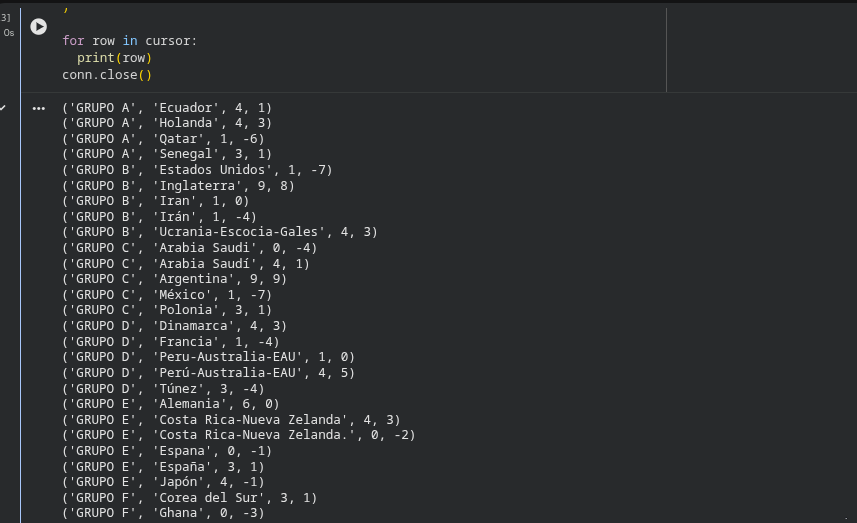

####SQL: Pregunta 2: Hemos cargado una tabla auxiliar con los resultados esperados de la Pregunta 1. La tabla se llama: "Resultados_Qatar" y tiene la siguiente estructura: (equipo, GRUPO, puntos, gol_diferencia)

<b>PEDIDOS:


2.1.   Determinar los 2 equipos con mayor puntaje que pasarán a la siguiente ronda por cada grupo.  En caso de que existan mas de dos equipos con derecho a pasar por tener igual número de puntos, se definirá quien pasa considerando el que tenga el mayor gol diferencia.

2.2.   Agregar un campo indicando en qué ciudad y Fecha/hora que jugarán en la siguiente ronda los equipos clasificados.

------------------------------------------------------
FUENTES:  
 

*   Tabla "Resultados_Qatar" que contiene los resultados por equipo.
*   Tabla "Clasificados" para concer las localidades 

In [ ]:
# Ejercicio # 2
conn = sqlite3.connect('test.db')

####PROGRAME SU RESPUESTA DENTRO DEL CONN.EXECUTE ENTRE LAS COMILLAS

cursor = conn.execute('''
  WITH base AS(
    SELECT
      grupo,
      equipo,
      ROW_NUMBER() OVER(
        PARTITION BY grupo
        ORDER BY puntos DESC, gol_diferencia DESC
      ) AS posicion
      
    FROM
      Resultados_Qatar
  ),

  sedes AS (
    SELECT
      partido AS partido_original,
      CASE
        WHEN partido LIKE '%A%B%' THEN 'GRUPO A1 - GRUPO B2'
        WHEN partido LIKE '%C%D%' THEN 'GRUPO C1 - GRUPO D2'
        WHEN partido LIKE '%D%C%' THEN 'GRUPO D1 - GRUPO C2'
        WHEN partido LIKE '%B%A%' THEN 'GRUPO B1 - GRUPO A2'
        WHEN partido LIKE '%E%F%' THEN 'GRUPO E1 - GRUPO F2'
        WHEN partido LIKE '%G%H%' THEN 'GRUPO G1 - GRUPO H2'
        WHEN partido LIKE '%F%E%' THEN 'GRUPO F1 - GRUPO E2'
        ELSE 'GRUPO H1 - GRUPO G2'
      END AS partido,
      (sede || ": " || fecha || " - " || hora) AS lugar_hora_partido

    FROM
      Clasificados
  )

  SELECT clasificados.*, sedes.lugar_hora_partido
  FROM base clasificados

  JOIN sedes
    ON INSTR(sedes.partido, clasificados.grupo || CAST(clasificados.posicion AS TEXT)) > 0

  WHERE clasificados.posicion IN (1,2)
                       ''')

for row in cursor:
  print(row)
conn.close()

## Respuesta

En este caso, la pregunta constaba de dos partes, y para su desarrollo se realizó de la misma forma inicialmente se tomo el punto 2.1, aplicando la función ROW_NUMBER en lugar por ejemplo de RANK ya que me permite tener la posición única, es decir, que no tendría dos números 1 o 2, y la lógica del desempate se realiza en el 'ORDER BY' para finalmente, seleccionar la posición 1 y 2.

La segunda parte del punto, consiste en agregar información de la ciudad, fecha y hora del partido, para este caso se aprovecho la estructura de la columna partido que tenia las letras en mayúsculas del grupo, además de que siempre se respetaba que el primer equipo del grupo estaba a la izquierda y se construyo una cadena que contenia esta estructura para realizar un join de manera sencilla teniendo en cuenta que un string se encontrara en el otro.

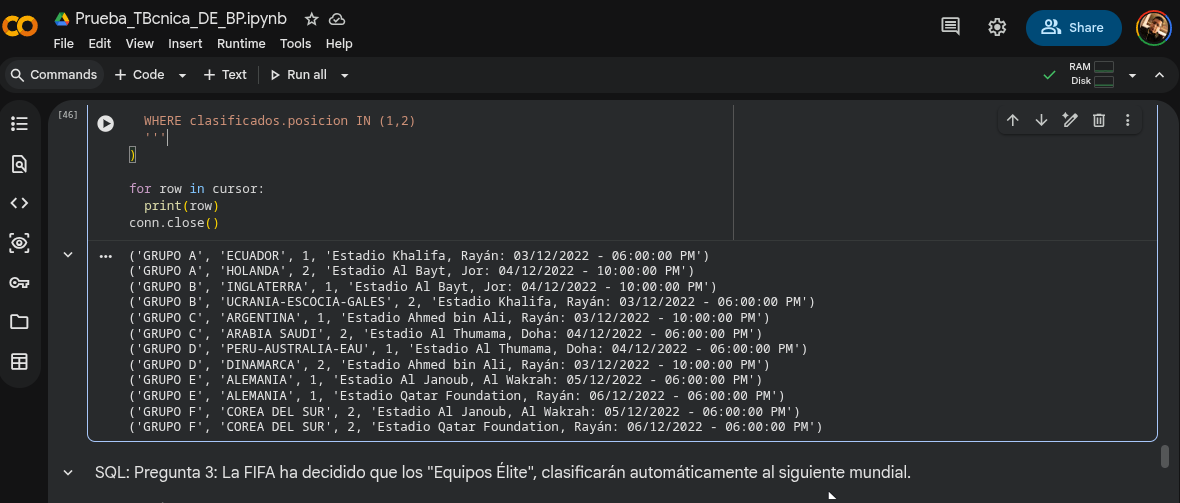

####SQL: Pregunta 3: La FIFA ha decidido que los "Equipos Élite", clasificarán automáticamente al siguiente mundial.  

*Equipos Élite: Aquellos equipos que se encuentren en el quintil mas alto a nivel de puntos acumulados.

<b>PEDIDOS

3.1.   Realizar una consulta que permita identificar los equipos que clasificarán al siguiente mundial de forma automática.


------------------------------------------------------
FUENTE:  Se recomienda utilizar la tabla "Resultados_Qatar".

In [ ]:
# Ejercicio # 3
conn = sqlite3.connect('test.db')

####PROGRAME SU RESPUESTA DENTRO DEL CONN.EXECUTE ENTRE LAS COMILLAS

cursor = conn.execute('''

                      

                      ;''')
for row in cursor:
  print(row)
conn.close()

##Sección 2: Pyspark

####PySpark: Pregunta 4: Se cuenta con dos listas que contienen información de los jugadores de fútbol mejor rankeados a nivel mundial y otra lista con el catálogo de países al que pertenecen.

<b> PEDIDOS:

4.1  Crear dos dataframes en función de las listas entregadas.

4.2. Consolidar los datos y crear una marca que permita identificar el mejor jugador rankeado por país.

4.3. Proponga un nuevo ranking en base a un indicador diseñado por usted que permita considerar no solamente los goles logrados, sinó que tenga en cuenta el número de partidos que necesitó para lograr esa cantidad de goles.

4.4  Almacenar el resultado en un archivo json ubicado en la ruta /tmp/Nuevo_Ranking.json con la siguiente estructura de ejemplo:
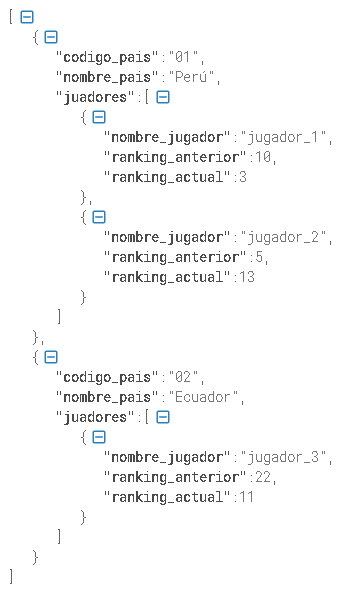

In [ ]:
# Ejercicio 8 Pyspark

import sys
from pyspark.mllib.random import RandomRDDs
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

# esquema de jugador: [(ranking, nombre, codigo_pais, numero_goles, numero_partidos_jugados)]
jugador = [("1", "Cristiano Ronaldo", "32", "115", "184"),("2", "Ali Daei", "24", "109", "148"),("3", "Mokhtar Dahari", "28", "89", "142"),("4", "Ferenc Puskás", "20", "84", "89"),("5", "Lionel Messi", "5", "81", "158"),("6", "Sunil Chhetri", "21", "80", "125"),("7", "Ali Mabkhout", "13", "79", "104"),("8", "Godfrey Chitalu", "39", "79", "111"),("9", "Hussein Saeed", "23", "78", "137"),("10", "Pelé", "8", "77", "92"),("11", "Sándor Kocsis", "19", "75", "68"),("12", "Kunishige Kamamoto", "26", "75", "76"),("13", "Bashar Abdullah", "27", "75", "134"),("14", "Robert Lewandowski", "31", "74", "128"),("15", "Majed Abdullah", "4", "72", "117"),("16", "Kinnah Phiri", "29", "71", "117"),("17", "Kiatisuk Senamuang", "36", "71", "134"),("18", "Miroslav Klose", "1", "71", "137"),("19", "Piyapong Pue-on", "36", "70", "100"),("20", "Abdul Kadir", "22", "70", "111"),("21", "Stern John", "37", "70", "115"),("22", "Neymar", "8", "70", "116"),("23", "Gerd Müller", "2", "68", "62"),("24", "Romelu Lukaku", "6", "68", "101"),("25", "Carlos Ruiz Gutiérrez", "17", "68", "133"),("26", "Robbie Keane", "25", "68", "146"),("27", "Hossam Hassan", "12", "68", "176"),("28", "Luis Suárez", "38", "67", "130"),("29", "Didier Drogba", "11", "65", "105"),("30", "Jasem Al-Huwaidi", "27", "63", "83"),("31", "Ronaldo Nazario", "8", "62", "98"),("32", "Zlatan Ibrahimović", "35", "62", "120"),("33", "Ahmed Radhi", "23", "62", "121"),("34", "Abdul Ghani Minhat", "16", "61", "71"),("35", "Edin Džeko", "7", "60", "118"),("36", "Imre Schlosser", "19", "59", "68"),("37", "David Villa", "14", "59", "98"),("38", "Cha Bum-Kun", "10", "58", "135"),("39", "Ali Ashfaq", "30", "57", "89"),("40", "Carlos Pavón", "18", "57", "101"),("41", "Clint Dempsey", "15", "57", "141"),("42", "Younis Mahmoud", "23", "57", "148"),("43", "Landon Donovan", "15", "57", "157"),("44", "Samuel Eto'o", "9", "56", "118"),("45", "Romário", "8", "55", "70"),("46", "Kazuyoshi Miura", "26", "55", "89"),("47", "Jan Koller", "33", "55", "91"),("48", "Iswadi Idris", "22", "55", "97"),("49", "Fandi Ahmad", "34", "55", "101"),("50", "Joachim Streich", "3", "55", "102")]

# esquema de país: [(codigo_pais, nombre_pais)]
pais = [("1", " Alemania"),("2", " Alemania Federal"),("3", " Alemania Oriental"),("4", " Arabia Saudita"),("5", " Argentina"),("6", " Bélgica"),("7", " Bosnia y Herzegovina"),("8", " Brasil"),("9", " Camerún"),("10", " Corea del Sur"),("11", " Costa de Marfil"),("12", " Egipto"),("13", " Emiratos Arabes Unidos"),("14", " España"),("15", " Estados Unidos"),("16", " Federación Malaya/ Malasia"),("17", " Guatemala"),("18", " Honduras"),("19", " Hungría"),("20", " Hungría/ España"),("21", " India"),("22", " Indonesia"),("23", " Irak"),("24", " Irán"),("25", " Irlanda"),("26", " Japón"),("27", " Kuwait"),("28", " Malasia"),("29", " Malawi"),("30", " Maldivas"),("31", " Polonia"),("32", " Portugal"),("33", " República Checa"),("34", " Singapur"),("35", " Suecia"),("36", " Tailandia"),("37", " Trinidad y Tobago"),("38", " Uruguay"),("39", " Zambia")]

####### PROGRAME SU RESPUESTA AQUI ##############

# Respuesta 2.1
# ===============================================

# Respuesta 2.2
# ===============================================

# Respuesta 2.3
# ===============================================

# Respuesta 2.4
# ===============================================

#################################################

spark.stop()

####PySpark: Pregunta 5:  Subir el archivo CENTROS_EDUCACION_MADRID.json a la ruta /content
<b> 5.1 Preparar un programa de pyspark que permita leer el archivo "CENTROS_EDUCACION_MADRID.json".

<b> 5.2 Periódicamente se realizarán reuniones de todos los centros que pertenezcan a un mismo "centro_titularidad" y se necesita determinar qué Centro educativo es el mas céntrico.   Para esto se cuenta con las coordenadas de cada centro educativo ("direccion_coor_x" y "direccion_coor_y").   

Procedimiento sugerido:  
   5.2.1  Determinar el promedio de las coordenadas "x" y "y" por cada grupo "centro_titularidad".

   5.2.2  Crear una udf que permita calcular la distancia euclideana desde cada unidad educativa del grupo hacia este punto promedio.

   5.2.3  Identificar cuál es la unidad educativa con menor distancia dentro de cada grupo.  Esta será la elegida como centro de reunión.

* DISTANCIA EUCLIDIANA
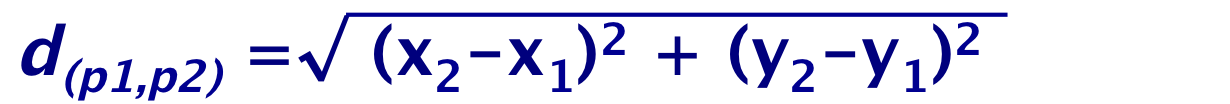


In [ ]:
from typing import cast
import sys
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import explode, col, desc, avg, min, max, rank, asc, round
from pyspark.sql import Window
from math import sqrt
from pyspark.sql.functions import udf

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

####### PROGRAME SU RESPUESTA AQUI ##############


#################################################


<b> 5.3 Exportar el resultado del ejercicio anterior en tres formatos:
1. parquet
2. json
3. csv (separado por caracter '|' y conservando la cabecera de la data)

Los tres archivos deberán crearse en la ruta /tmp

5.4.  Qué formato utilizaría para almacenar y procesar grandes volúmenes de datos en Databricks.  Justifique porqué no seleccionó los otros dos formatos.

<b>Nota:  Desarrolle su análisis en el espacio comentado


In [ ]:
from typing import cast
import sys
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import explode, col, desc, avg, min, max, rank, asc, round
from pyspark.sql import Window
from math import sqrt
from pyspark.sql.functions import udf

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

####### PROGRAME SU RESPUESTA AQUI ##############


# 5.3 Respuesta: 
# ===============================================



# 5.3 Justificación: 
#
#
#
#################################################
